In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### LİBRARİES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping


### DATA READİNG

In [2]:
from PIL import Image

im = Image.open('../input/cell-images-for-detecting-malaria/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144348_cell_144.png')
print(im.size)
im = Image.open('../input/cell-images-for-detecting-malaria/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144823_cell_160.png')
print(im.size)
im = Image.open('../input/cell-images-for-detecting-malaria/cell_images/Parasitized/C100P61ThinF_IMG_20150918_145422_cell_163.png')
print(im.size)

FileNotFoundError: [Errno 2] No such file or directory: '../input/cell-images-for-detecting-malaria/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144348_cell_144.png'

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

In [8]:
width, height = 128,128
trainDatagen = datagen.flow_from_directory(directory='../input/cell-images-for-detecting-malaria/cell_images/cell_images/',
                                           target_size=(width,height), class_mode = 'binary', batch_size = 16, 
                                           subset='training')

valDatagen = datagen.flow_from_directory(directory='../input/cell-images-for-detecting-malaria/cell_images/cell_images/',
                                           target_size=(width,height), class_mode = 'binary', batch_size = 16,
                                           subset='validation')

Found 22048 images belonging to 2 classes.
Found 5510 images belonging to 2 classes.


In [9]:
model = Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(128,128,3)))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 63, 63, 16)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 64)       

In [11]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
history = model.fit_generator(generator = trainDatagen, steps_per_epoch = len(trainDatagen), epochs =20, validation_data = valDatagen,
                              validation_steps=len(valDatagen))

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-12-13 01:03:03.611645: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
1378/1378 [==============================] - 194s 140ms/step - loss: 0.5587 - accuracy: 0.6875 - val_loss: 0.3371 - val_accuracy: 0.8702
Epoch 2/20
1378/1378 [==============================] - 118s 85ms/step - loss: 0.2679 - accuracy: 0.9203 - val_loss: 0.2117 - val_accuracy: 0.9289
Epoch 3/20
1378/1378 [==============================] - 116s 84ms/step - loss: 0.1846 - accuracy: 0.9479 - val_loss: 0.1909 - val_accuracy: 0.9403
Epoch 4/20
1378/1378 [==============================] - 114s 83ms/step - loss: 0.1615 - accuracy: 0.9533 - val_loss: 0.1764 - val_accuracy: 0.9358
Epoch 5/20
1378/1378 [==============================] - 115s 83ms/step - loss: 0.1563 - accuracy: 0.9530 - val_loss: 0.1787 - val_accuracy: 0.9334
Epoch 6/20
1378/1378 [==============================] - 117s 85ms/step - loss: 0.1506 - accuracy: 0.9549 - val_loss: 0.1915 - val_accuracy: 0.9365
Epoch 7/20
1378/1378 [==============================] - 117s 85ms/step - loss: 0.1414 - accuracy: 0.9546 - val_loss: 

In [13]:
summary = pd.DataFrame(model.history.history)
summary

,loss,accuracy,val_loss,val_accuracy
0,0.558691,0.687500,0.337053,0.870236
1,0.267919,0.920310,0.211723,0.928857
2,0.184620,0.947932,0.190876,0.940290
3,0.161547,0.953284,0.176429,0.935753
4,0.156328,0.953012,0.178723,0.933394
5,0.150609,0.954871,0.191496,0.936479
6,0.141355,0.954599,0.166521,0.942105
7,0.138294,0.956323,0.168167,0.943013
8,0.139077,0.955869,0.257856,0.930672
9,0.141330,0.953964,0.172425,0.944465


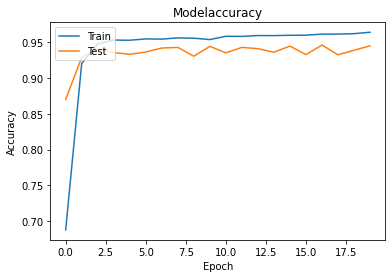

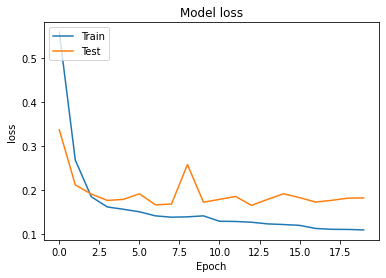

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Modelaccuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train","Test"],loc="upper left")
plt.show()

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("loss")
plt.xlabel("Epoch")
plt.legend(["Train","Test"],loc="upper left")
plt.show()